# STOCK MARKET ANALYSIS - CHUANG TSUNG CHIH

In [1]:
"""""
From POSTGRE SQL
--------------------------
Part (a)

# Inset data into tables
--------------------------
Part (b)

# Prepare a table to extract the data into
CREATE TABLE CombinedStockData (
    Date DATE,
    Close_Last_nvidia VARCHAR,
    Close_Last_sp500 VARCHAR,
    Close_Last_apple VARCHAR,
    Close_Last_amd VARCHAR
);

# Extract the closing price of nvidia, s and p 500, apple and amd starting from 2014-6-13 to 2024-6-12
# Combine the title of all "date" columns into "date"
INSERT INTO CombinedStockData (Date, Close_Last_nvidia, Close_Last_sp500, Close_Last_apple, Close_Last_amd)
SELECT
    COALESCE(nvidia.Date, sp500.Date, apple.Date, amd.Date) AS Date,
    nvidia.Close_Last AS Close_Last_nvidia,
    sp500.Close_Last AS Close_Last_sp500,
    apple.Close_Last AS Close_Last_apple,
    amd.Close_Last AS Close_Last_amd

# Perform a full outer join between the "nvidia" table and the "sp500" table on the "Date" column. 
# This join will include all rows from both tables, with matching rows from both sides where available. 
# If there is no match, the result will include NULLs for columns from the table that lacks a match.
# Repeat the same step until all the dates are matched
FROM
    nvidia
FULL OUTER JOIN sp500 ON nvidia.Date = sp500.Date
FULL OUTER JOIN apple ON COALESCE(nvidia.Date, sp500.Date) = apple.Date
FULL OUTER JOIN amd ON COALESCE(nvidia.Date, sp500.Date, apple.Date) = amd.Date;

--------------------------
# Check the newly combined data
SELECT * FROM CombinedStockData;

"""


'""\nFrom POSTGRE SQL\n--------------------------\nPart (a)\n\n# Inset data into tables\n--------------------------\nPart (b)\n\n# Prepare a table to extract the data into\nCREATE TABLE CombinedStockData (\n    Date DATE,\n    Close_Last_nvidia VARCHAR,\n    Close_Last_sp500 VARCHAR,\n    Close_Last_apple VARCHAR,\n    Close_Last_amd VARCHAR\n);\n\n# Extract the closing price of nvidia, s and p 500, apple and amd starting from 2014-6-13 to 2024-6-12\n# Combine the title of all "date" columns into "date"\nINSERT INTO CombinedStockData (Date, Close_Last_nvidia, Close_Last_sp500, Close_Last_apple, Close_Last_amd)\nSELECT\n    COALESCE(nvidia.Date, sp500.Date, apple.Date, amd.Date) AS Date,\n    nvidia.Close_Last AS Close_Last_nvidia,\n    sp500.Close_Last AS Close_Last_sp500,\n    apple.Close_Last AS Close_Last_apple,\n    amd.Close_Last AS Close_Last_amd\n\n# Perform a full outer join between the "nvidia" table and the "sp500" table on the "Date" column. \n# This join will include all ro

In [2]:
# Import the necessary libraries (pandas, numpy)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style= 'ticks')


In [3]:
# Reading the files 

df = pd.read_csv("/Users/osbert/Desktop/SQL/stock_data.csv")

In [4]:
# Details of first three closing price of nvidia, s and p 500, apple and amd
df.head(3)

,date,close_last_nvidia,close_last_sp500,close_last_apple,close_last_amd
0,2024-06-12,$125.20,5421.03,$213.07,$160.24
1,2024-06-11,$120.91,5375.32,$207.15,$158.96
2,2024-06-10,$121.79,5360.79,$193.12,$160.34


In [5]:
# Understanding the nulls in the data
print(df.isnull().sum())

date                  0
close_last_nvidia    13
close_last_sp500      0
close_last_apple     13
close_last_amd       13
dtype: int64


In [6]:
# Summary Stats
df.describe()

,close_last_sp500
count,5047.000000
mean,3147.578100
std,963.979077
min,1829.080000
25%,2204.720000
50%,2880.340000
75%,4056.825000
max,5421.030000


## Data Cleaning and Preparation

In [7]:
# Convert the cleaned DataFrame to a list of dictionaries
stock_data = df.to_dict('records')

# Print the first 5 records from the cleaned data list
print("Data List (First 5 Records):")
for record in stock_data[:5]:
    print(record)

Data List (First 5 Records):
{'date': '2024-06-12', 'close_last_nvidia': '$125.20', 'close_last_sp500': 5421.03, 'close_last_apple': '$213.07', 'close_last_amd': '$160.24'}
{'date': '2024-06-11', 'close_last_nvidia': '$120.91', 'close_last_sp500': 5375.32, 'close_last_apple': '$207.15', 'close_last_amd': '$158.96'}
{'date': '2024-06-10', 'close_last_nvidia': '$121.79', 'close_last_sp500': 5360.79, 'close_last_apple': '$193.12', 'close_last_amd': '$160.34'}
{'date': '2024-06-07', 'close_last_nvidia': '$120.888', 'close_last_sp500': 5346.99, 'close_last_apple': '$196.89', 'close_last_amd': '$167.87'}
{'date': '2024-06-06', 'close_last_nvidia': '$120.998', 'close_last_sp500': 5352.96, 'close_last_apple': '$194.48', 'close_last_amd': '$166.78'}


In [30]:
# Function to check for null values in the list of dictionaries
def find_nulls_in_dict_list(data_list):
    null_records = []
    null_counts = {}

    # Iterate through each record in the data list
    for record in data_list:
        has_null = False
        for key, value in record.items():
            if pd.isnull(value) or value == '':
                has_null = True
                if key not in null_counts:
                    null_counts[key] = 0
                null_counts[key] += 1
        if has_null:
            null_records.append(record)

    return null_records, null_counts

# Check for null values in the stock data list
null_records, null_counts = find_nulls_in_dict_list(stock_data)

# Print the records with null values
if null_records:  # If there are any records with null values
    print("\nRecords with null values:")  # Print a header indicating that null records will be shown
    for record in null_records:  # Iterate through each record with null values
        print(record)  # Print the record
else:  # If there are no records with null values
    print("\nNo records with null values found.")  # Print a message indicating that no null records were found

# Print the number of null values in each key
print("\nNumber of null values in each key:")  # Print a header indicating that the null value counts will be shown
for key, count in null_counts.items():  # Iterate through each key-count pair in the null_counts dictionary
    print(f"{key}: {count}")  # Print the key and the count of null values for that key


Records with null values:
{'date': '2015-09-07', 'close_last_nvidia': nan, 'close_last_sp500': 1921.22, 'close_last_apple': nan, 'close_last_amd': nan}
{'date': '2015-12-25', 'close_last_nvidia': nan, 'close_last_sp500': 2060.99, 'close_last_apple': nan, 'close_last_amd': nan}
{'date': '2015-05-25', 'close_last_nvidia': nan, 'close_last_sp500': 2126.06, 'close_last_apple': nan, 'close_last_amd': nan}
{'date': '2014-12-25', 'close_last_nvidia': nan, 'close_last_sp500': 2081.88, 'close_last_apple': nan, 'close_last_amd': nan}
{'date': '2014-11-27', 'close_last_nvidia': nan, 'close_last_sp500': 2072.83, 'close_last_apple': nan, 'close_last_amd': nan}
{'date': '2014-09-01', 'close_last_nvidia': nan, 'close_last_sp500': 2003.37, 'close_last_apple': nan, 'close_last_amd': nan}
{'date': '2015-04-03', 'close_last_nvidia': nan, 'close_last_sp500': 2066.96, 'close_last_apple': nan, 'close_last_amd': nan}
{'date': '2015-01-01', 'close_last_nvidia': nan, 'close_last_sp500': 2058.9, 'close_last_ap

In [9]:
# Drop rows with any missing values
df_missing = df.dropna()

# Convert the cleaned DataFrame to a list of dictionaries
cleaned_data_list = df_missing.to_dict('records')

# Print the cleaned data list
print("Cleaned Data List:")
for record in cleaned_data_list:
    print(record)

Cleaned Data List:
{'date': '2024-06-12', 'close_last_nvidia': '$125.20', 'close_last_sp500': 5421.03, 'close_last_apple': '$213.07', 'close_last_amd': '$160.24'}
{'date': '2024-06-11', 'close_last_nvidia': '$120.91', 'close_last_sp500': 5375.32, 'close_last_apple': '$207.15', 'close_last_amd': '$158.96'}
{'date': '2024-06-10', 'close_last_nvidia': '$121.79', 'close_last_sp500': 5360.79, 'close_last_apple': '$193.12', 'close_last_amd': '$160.34'}
{'date': '2024-06-07', 'close_last_nvidia': '$120.888', 'close_last_sp500': 5346.99, 'close_last_apple': '$196.89', 'close_last_amd': '$167.87'}
{'date': '2024-06-06', 'close_last_nvidia': '$120.998', 'close_last_sp500': 5352.96, 'close_last_apple': '$194.48', 'close_last_amd': '$166.78'}
{'date': '2024-06-05', 'close_last_nvidia': '$122.44', 'close_last_sp500': 5354.03, 'close_last_apple': '$195.87', 'close_last_amd': '$166.17'}
{'date': '2024-06-04', 'close_last_nvidia': '$116.437', 'close_last_sp500': 5291.34, 'close_last_apple': '$194.35',

In [10]:
null_records, null_counts = find_nulls_in_dict_list(cleaned_data_list)

if null_records:  
    print("\nRecords with null values:") 
    for record in null_records:  
        print(record)  
else:  
    print("\nNo records with null values found.") 

print("\nNumber of null values in each key:")  
for key, count in null_counts.items(): 
    print(f"{key}: {count}")
    


No records with null values found.

Number of null values in each key:


In [31]:
# Function to remove dollar signs and convert to float
def clean_dollar(record):
    for key, value in record.items():
        if isinstance(value, str) and '$' in value:
            record[key] = float(value.replace('$', ''))
    return record

# Clean each record in the list
cleaned_data_list = [clean_dollar(record) for record in cleaned_data_list]

for record in (cleaned_data_list)[:5]:
    print(record)   
    

{'date': '2024-06-12', 'close_last_nvidia': 125.2, 'close_last_sp500': 5421.03, 'close_last_apple': 213.07, 'close_last_amd': 160.24}
{'date': '2024-06-11', 'close_last_nvidia': 120.91, 'close_last_sp500': 5375.32, 'close_last_apple': 207.15, 'close_last_amd': 158.96}
{'date': '2024-06-10', 'close_last_nvidia': 121.79, 'close_last_sp500': 5360.79, 'close_last_apple': 193.12, 'close_last_amd': 160.34}
{'date': '2024-06-07', 'close_last_nvidia': 120.888, 'close_last_sp500': 5346.99, 'close_last_apple': 196.89, 'close_last_amd': 167.87}
{'date': '2024-06-06', 'close_last_nvidia': 120.998, 'close_last_sp500': 5352.96, 'close_last_apple': 194.48, 'close_last_amd': 166.78}


## Exploratory Data Analysis

### Data Visualization

In [12]:
# Convert the cleaned data list into a DataFrame
cleaned_df = pd.DataFrame(cleaned_data_list)

cleaned_df



,date,close_last_nvidia,close_last_sp500,close_last_apple,close_last_amd
0,2024-06-12,125.2000,5421.03,213.070,160.24
1,2024-06-11,120.9100,5375.32,207.150,158.96
2,2024-06-10,121.7900,5360.79,193.120,160.34
3,2024-06-07,120.8880,5346.99,196.890,167.87
4,2024-06-06,120.9980,5352.96,194.480,166.78
...,...,...,...,...,...
5029,2014-06-19,0.4785,1959.48,22.965,4.36
5030,2014-06-18,0.4898,1956.98,23.045,4.40
5031,2014-06-17,0.4903,1941.99,23.020,4.47
5032,2014-06-16,0.4870,1937.78,23.050,4.44


In [13]:
# TEST
cleaned_df

,date,close_last_nvidia,close_last_sp500,close_last_apple,close_last_amd
0,2024-06-12,125.2000,5421.03,213.070,160.24
1,2024-06-11,120.9100,5375.32,207.150,158.96
2,2024-06-10,121.7900,5360.79,193.120,160.34
3,2024-06-07,120.8880,5346.99,196.890,167.87
4,2024-06-06,120.9980,5352.96,194.480,166.78
...,...,...,...,...,...
5029,2014-06-19,0.4785,1959.48,22.965,4.36
5030,2014-06-18,0.4898,1956.98,23.045,4.40
5031,2014-06-17,0.4903,1941.99,23.020,4.47
5032,2014-06-16,0.4870,1937.78,23.050,4.44


#### Plotting stock prices for APPLE, NVIDIA, S&P500 and AMD

/var/folders/7p/nnq37v5n39s2jtsql5bdy6br0000gn/T/ipykernel_85226/2251659938.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.sort_values(by='date', inplace=True)


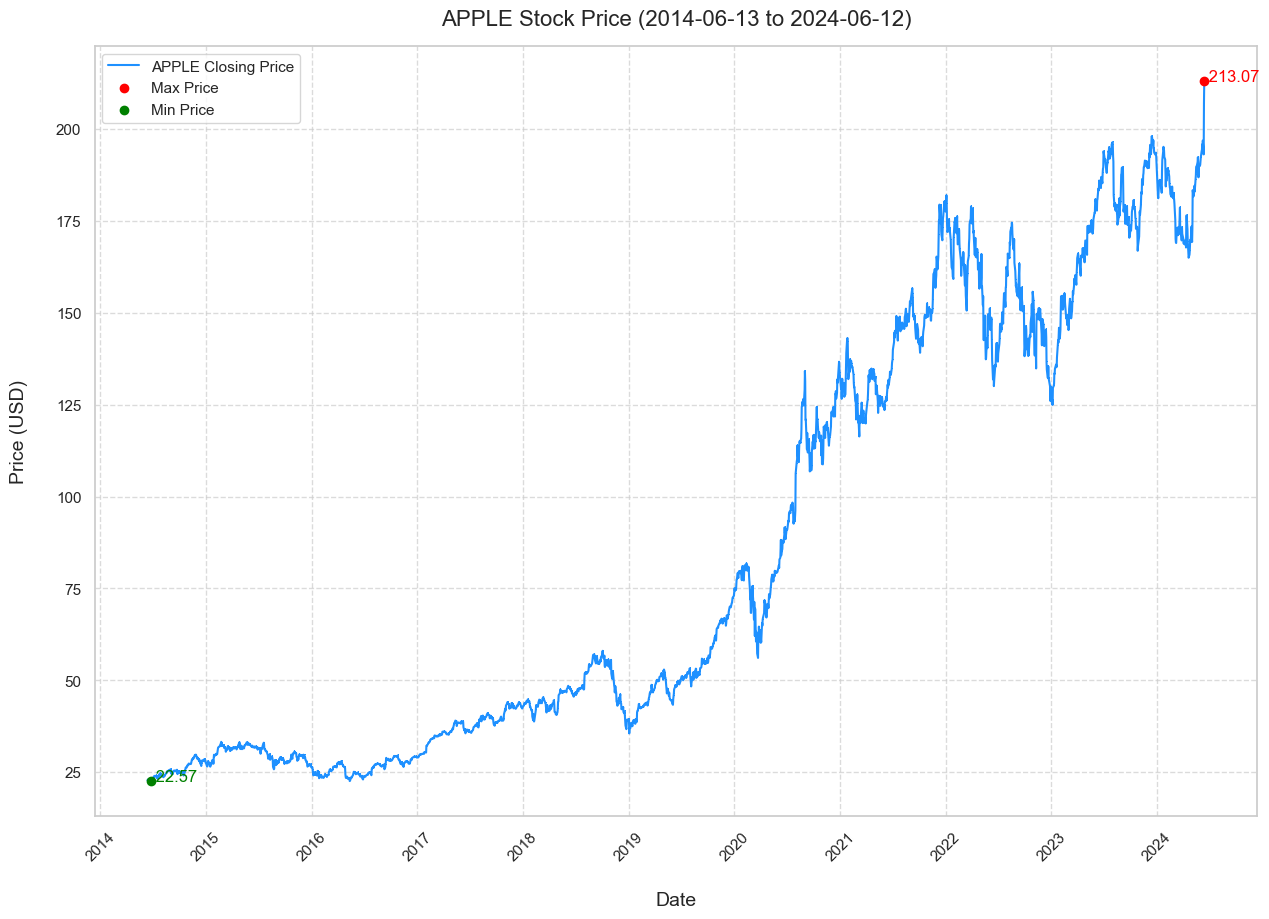

In [14]:
# Ensure 'date' column is in datetime format
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])

# Remove duplicate dates
cleaned_df = cleaned_df.drop_duplicates(subset='date')

# Fix issue: wrap-around
# Ensure that the data is continuous and correctly formatted without any unexpected jumps or gaps that might cause the plotting library to wrap around the data

# Ensure data is sorted by date 
cleaned_df.sort_values(by='date', inplace=True)
# Set 'date' column as the index
cleaned_df.set_index('date', inplace=True)

# Use seaborn style for better aesthetics
sns.set_style('whitegrid')

# Plot the DataFrame
plt.figure(figsize=(15, 10))

# Plot the 'close_last_apple' column
plt.plot(cleaned_df.index, cleaned_df['close_last_apple'], marker=',', linestyle='-', color='dodgerblue', label='APPLE Closing Price')

# Highlight the maximum and minimum points
max_price = cleaned_df['close_last_apple'].max()
min_price = cleaned_df['close_last_apple'].min()
max_date = cleaned_df['close_last_apple'].idxmax()
min_date = cleaned_df['close_last_apple'].idxmin()

plt.scatter([max_date], [max_price], color='red', zorder=5, label='Max Price')
plt.scatter([min_date], [min_price], color='green', zorder=5, label='Min Price')
plt.text(max_date, max_price, f' {max_price:.2f}', horizontalalignment='left', color='red')
plt.text(min_date, min_price, f' {min_price:.2f}', horizontalalignment='left', color='green')

# Customize the plot
plt.title('APPLE Stock Price (2014-06-13 to 2024-06-12)', pad=15, fontsize=16)
plt.xlabel('Date', labelpad=20, fontsize=14)
plt.ylabel('Price (USD)', labelpad=20, fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

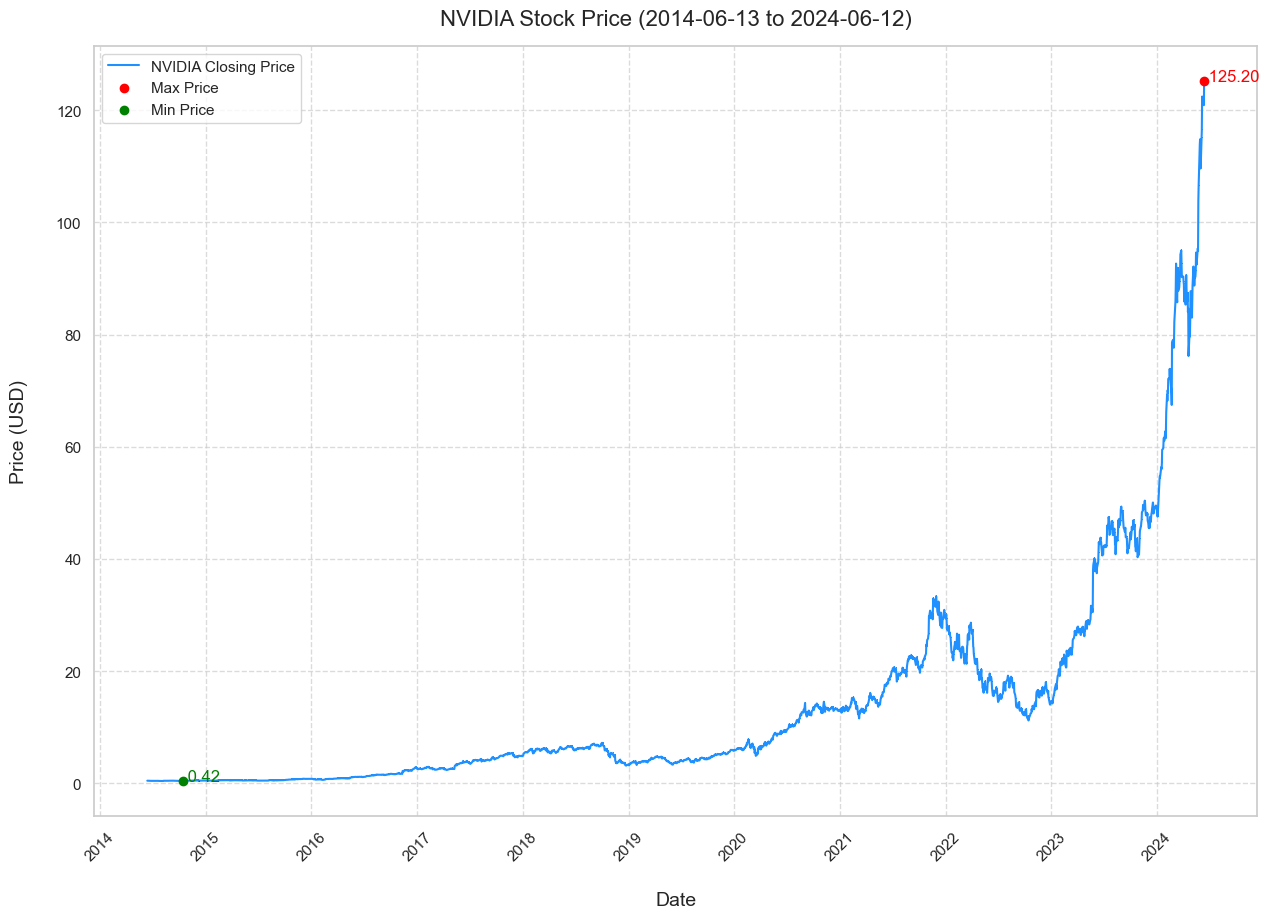

In [15]:
# Plot the DataFrame
plt.figure(figsize=(15, 10))

# Plot the line connecting all points except the first and last
plt.plot(cleaned_df.index[:], cleaned_df['close_last_nvidia'][:], 
         marker=',', linestyle='-', color='dodgerblue', label='NVIDIA Closing Price')

# Highlight the maximum and minimum points
max_price = cleaned_df['close_last_nvidia'].max()
min_price = cleaned_df['close_last_nvidia'].min()
max_date = cleaned_df['close_last_nvidia'].idxmax()
min_date = cleaned_df['close_last_nvidia'].idxmin()

plt.scatter([max_date], [max_price], color='red', zorder=5, label='Max Price')
plt.scatter([min_date], [min_price], color='green', zorder=5, label='Min Price')
plt.text(max_date, max_price, f' {max_price:.2f}', horizontalalignment='left', color='red')
plt.text(min_date, min_price, f' {min_price:.2f}', horizontalalignment='left', color='green')

# Customize the plot
plt.title('NVIDIA Stock Price (2014-06-13 to 2024-06-12)', pad=15, fontsize=16)
plt.xlabel('Date', labelpad=20, fontsize=14)
plt.ylabel('Price (USD)', labelpad=20, fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

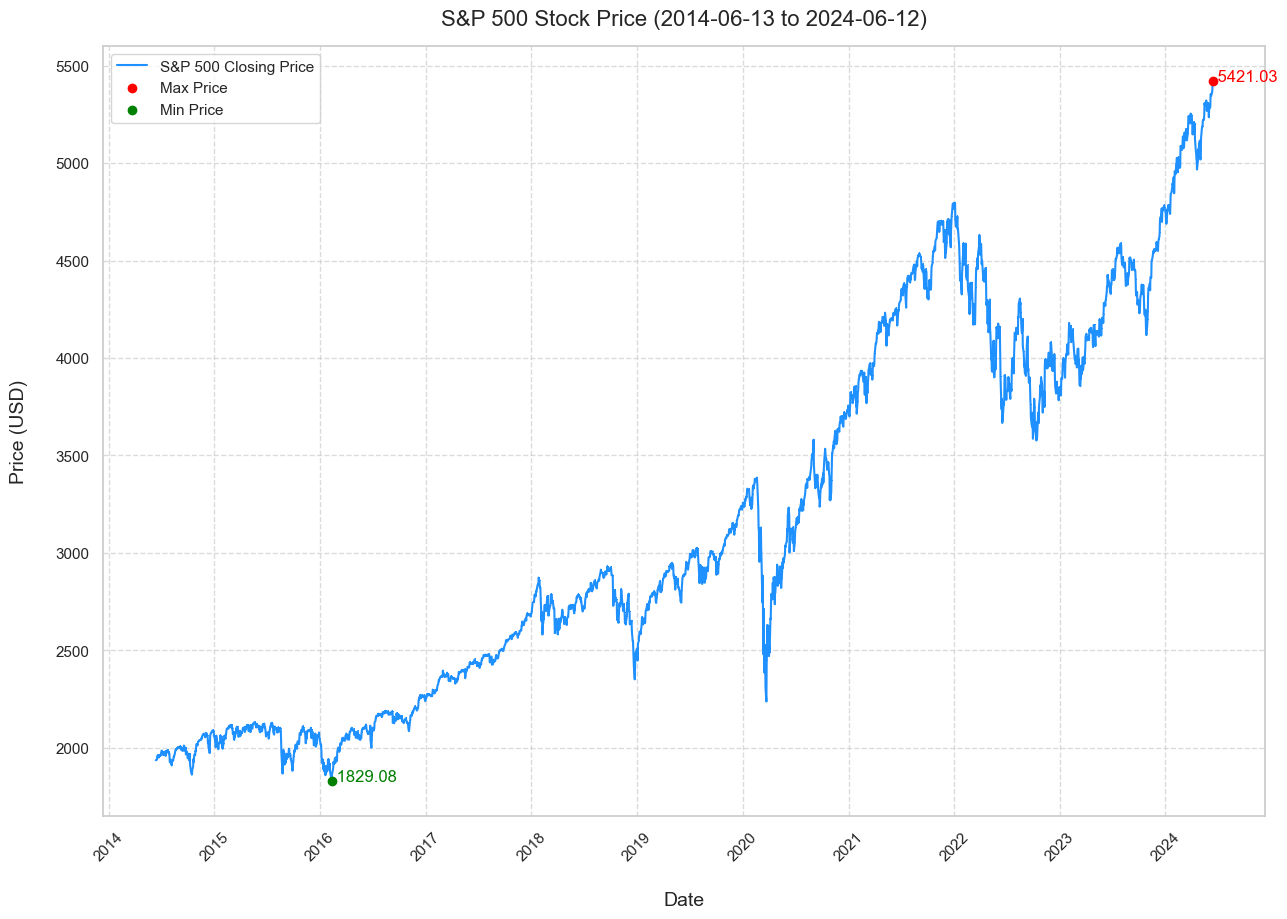

In [16]:
# Plot the DataFrame
plt.figure(figsize=(15, 10))

# Plot the line connecting all points except the first and last
plt.plot(cleaned_df.index[:], cleaned_df['close_last_sp500'][:], 
         marker=',', linestyle='-', color='dodgerblue', label='S&P 500 Closing Price')

# Highlight the maximum and minimum points
max_price = cleaned_df['close_last_sp500'].max()
min_price = cleaned_df['close_last_sp500'].min()
max_date = cleaned_df['close_last_sp500'].idxmax()
min_date = cleaned_df['close_last_sp500'].idxmin()

plt.scatter([max_date], [max_price], color='red', zorder=5, label='Max Price')
plt.scatter([min_date], [min_price], color='green', zorder=5, label='Min Price')
plt.text(max_date, max_price, f' {max_price:.2f}', horizontalalignment='left', color='red')
plt.text(min_date, min_price, f' {min_price:.2f}', horizontalalignment='left', color='green')

# Customize the plot
plt.title('S&P 500 Stock Price (2014-06-13 to 2024-06-12)', pad=15, fontsize=16)
plt.xlabel('Date', labelpad=20, fontsize=14)
plt.ylabel('Price (USD)', labelpad=20, fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

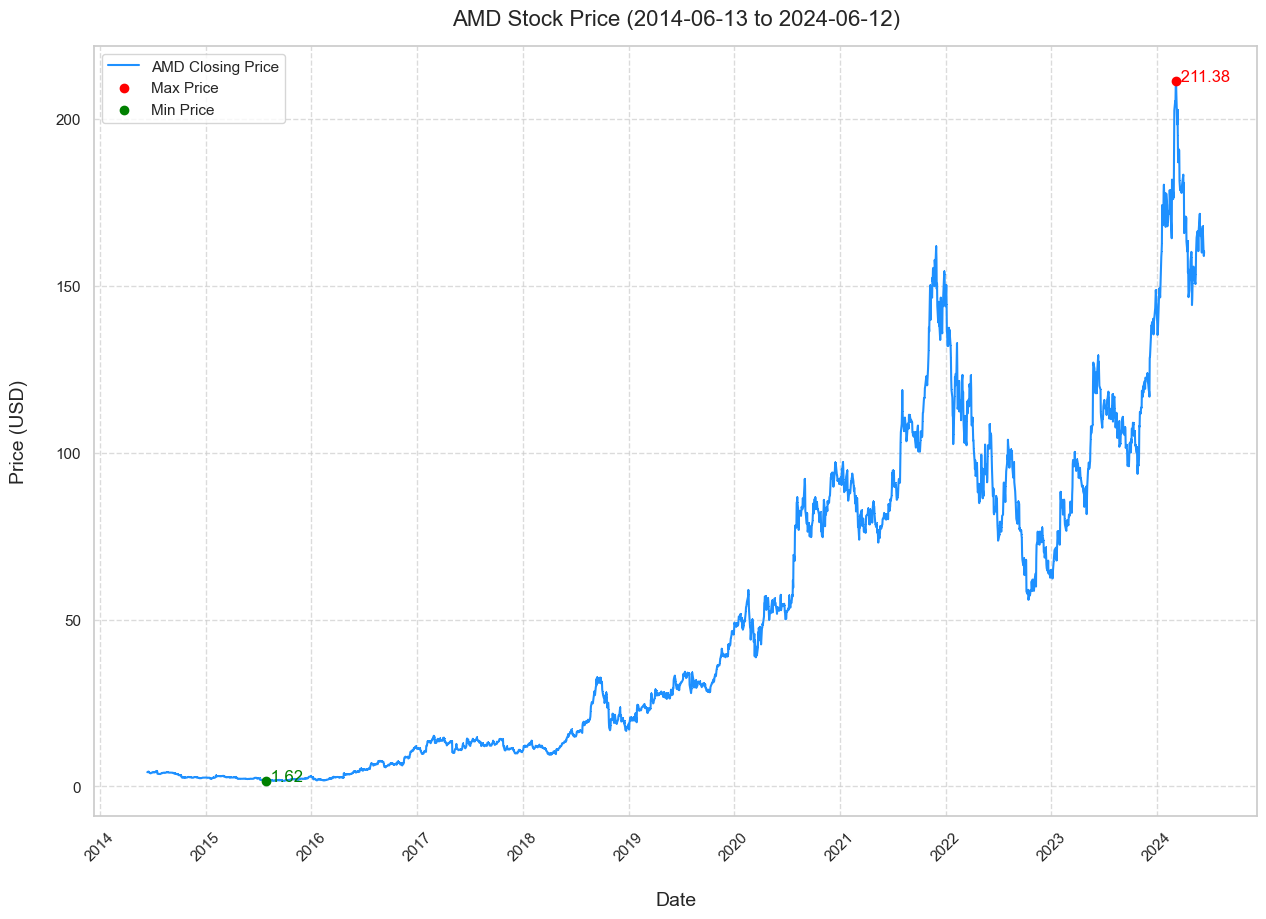

In [17]:
# Plot the DataFrame
plt.figure(figsize=(15, 10))

# Plot the line connecting all points except the first and last
plt.plot(cleaned_df.index[:], cleaned_df['close_last_amd'][:], 
         marker=',', linestyle='-', color='dodgerblue', label='AMD Closing Price')

# Highlight the maximum and minimum points
max_price = cleaned_df['close_last_amd'].max()
min_price = cleaned_df['close_last_amd'].min()
max_date = cleaned_df['close_last_amd'].idxmax()
min_date = cleaned_df['close_last_amd'].idxmin()

plt.scatter([max_date], [max_price], color='red', zorder=5, label='Max Price')
plt.scatter([min_date], [min_price], color='green', zorder=5, label='Min Price')
plt.text(max_date, max_price, f' {max_price:.2f}', horizontalalignment='left', color='red')
plt.text(min_date, min_price, f' {min_price:.2f}', horizontalalignment='left', color='green')

# Customize the plot
plt.title('AMD Stock Price (2014-06-13 to 2024-06-12)', pad=15, fontsize=16)
plt.xlabel('Date', labelpad=20, fontsize=14)
plt.ylabel('Price (USD)', labelpad=20, fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)


#### Overview of stock prices over the years of 2014-06-13 to 2024-06-12

/var/folders/7p/nnq37v5n39s2jtsql5bdy6br0000gn/T/ipykernel_85226/2499623113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['sp500_zscore'] = (cleaned_df['close_last_sp500'] - cleaned_df['close_last_sp500'].mean()) / cleaned_df['close_last_sp500'].std()
/var/folders/7p/nnq37v5n39s2jtsql5bdy6br0000gn/T/ipykernel_85226/2499623113.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['nvidia_zscore'] = (cleaned_df['close_last_nvidia'] - cleaned_df['close_last_nvidia'].mean()) / cleaned_

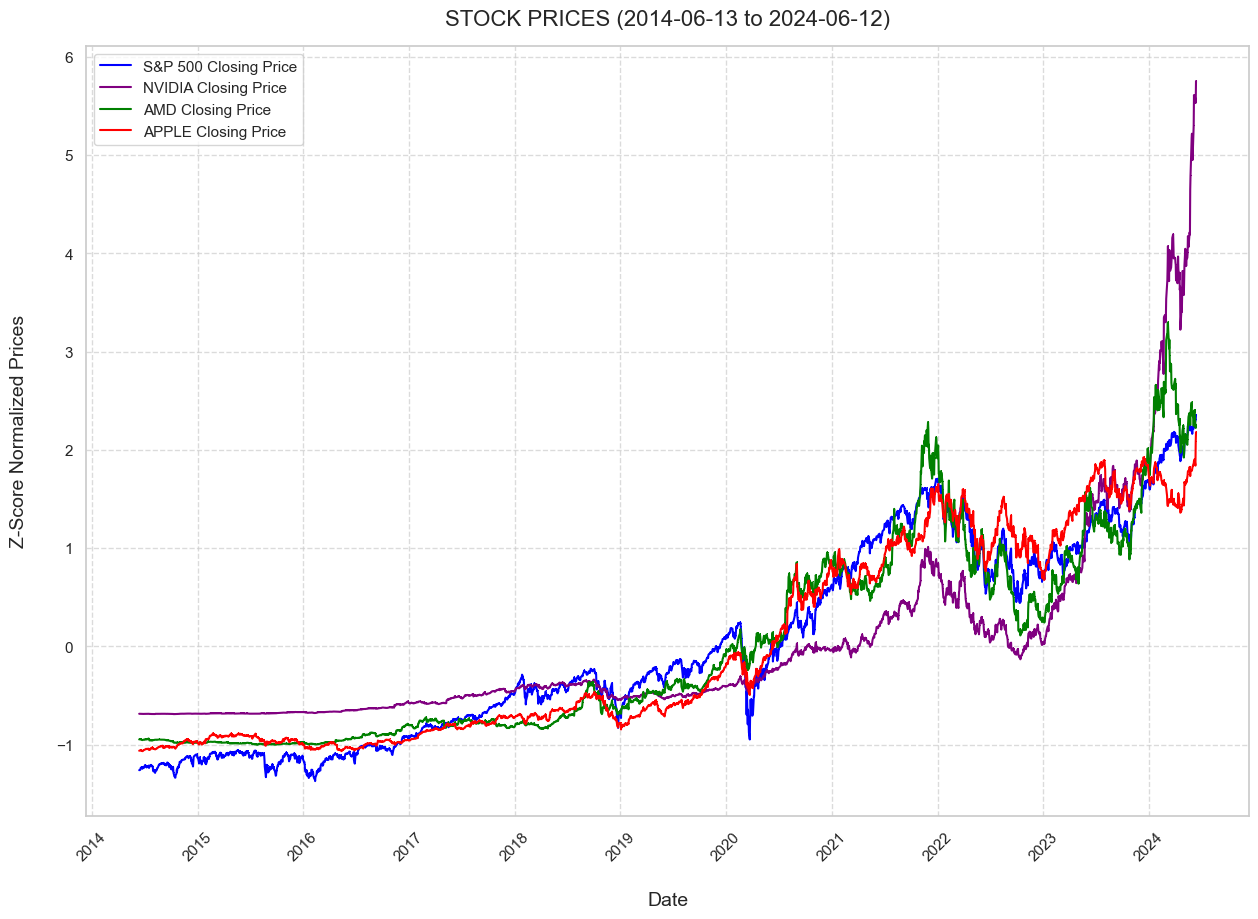

In [18]:
# Plot the DataFrame
plt.figure(figsize=(15, 10))

# Z-Score Normalization
cleaned_df['sp500_zscore'] = (cleaned_df['close_last_sp500'] - cleaned_df['close_last_sp500'].mean()) / cleaned_df['close_last_sp500'].std()
cleaned_df['nvidia_zscore'] = (cleaned_df['close_last_nvidia'] - cleaned_df['close_last_nvidia'].mean()) / cleaned_df['close_last_nvidia'].std()
cleaned_df['amd_zscore'] = (cleaned_df['close_last_amd'] - cleaned_df['close_last_amd'].mean()) / cleaned_df['close_last_amd'].std()
cleaned_df['apple_zscore'] = (cleaned_df['close_last_apple'] - cleaned_df['close_last_apple'].mean()) / cleaned_df['close_last_apple'].std()

# Plotting normalized s and p 500 stock price
plt.plot(cleaned_df.index[:], cleaned_df['sp500_zscore'][:], 
         marker=',', linestyle='-', color='blue', label='S&P 500 Closing Price')

# Plotting normalized nvidia stock price
plt.plot(cleaned_df.index[:], cleaned_df['nvidia_zscore'][:], 
         marker=',', linestyle='-', color='purple', label='NVIDIA Closing Price')

# Plotting normalized amd stock price
plt.plot(cleaned_df.index[:], cleaned_df['amd_zscore'][:], 
         marker=',', linestyle='-', color='green', label='AMD Closing Price')

# Plotting normalized apple stock price
plt.plot(cleaned_df.index[:], cleaned_df['apple_zscore'][:], 
         marker=',', linestyle='-', color='red', label='APPLE Closing Price')

# Customize the plot
plt.title('STOCK PRICES (2014-06-13 to 2024-06-12)', pad=15, fontsize=16)
plt.xlabel('Date', labelpad=20, fontsize=14)
plt.ylabel('Z-Score Normalized Prices', labelpad=20, fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)


#### Correlation

#### Average Daily Increase For Each Stock

/var/folders/7p/nnq37v5n39s2jtsql5bdy6br0000gn/T/ipykernel_85226/4152962313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['daily_return_nvidia'] = cleaned_df['close_last_nvidia'].pct_change() * 100
/var/folders/7p/nnq37v5n39s2jtsql5bdy6br0000gn/T/ipykernel_85226/4152962313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['daily_return_apple'] = cleaned_df['close_last_apple'].pct_change() * 100
/var/folders/7p/nnq37v5n39s2jtsql5bdy6br0000gn/T/ipykernel_85226/4152962313.py:4: Se

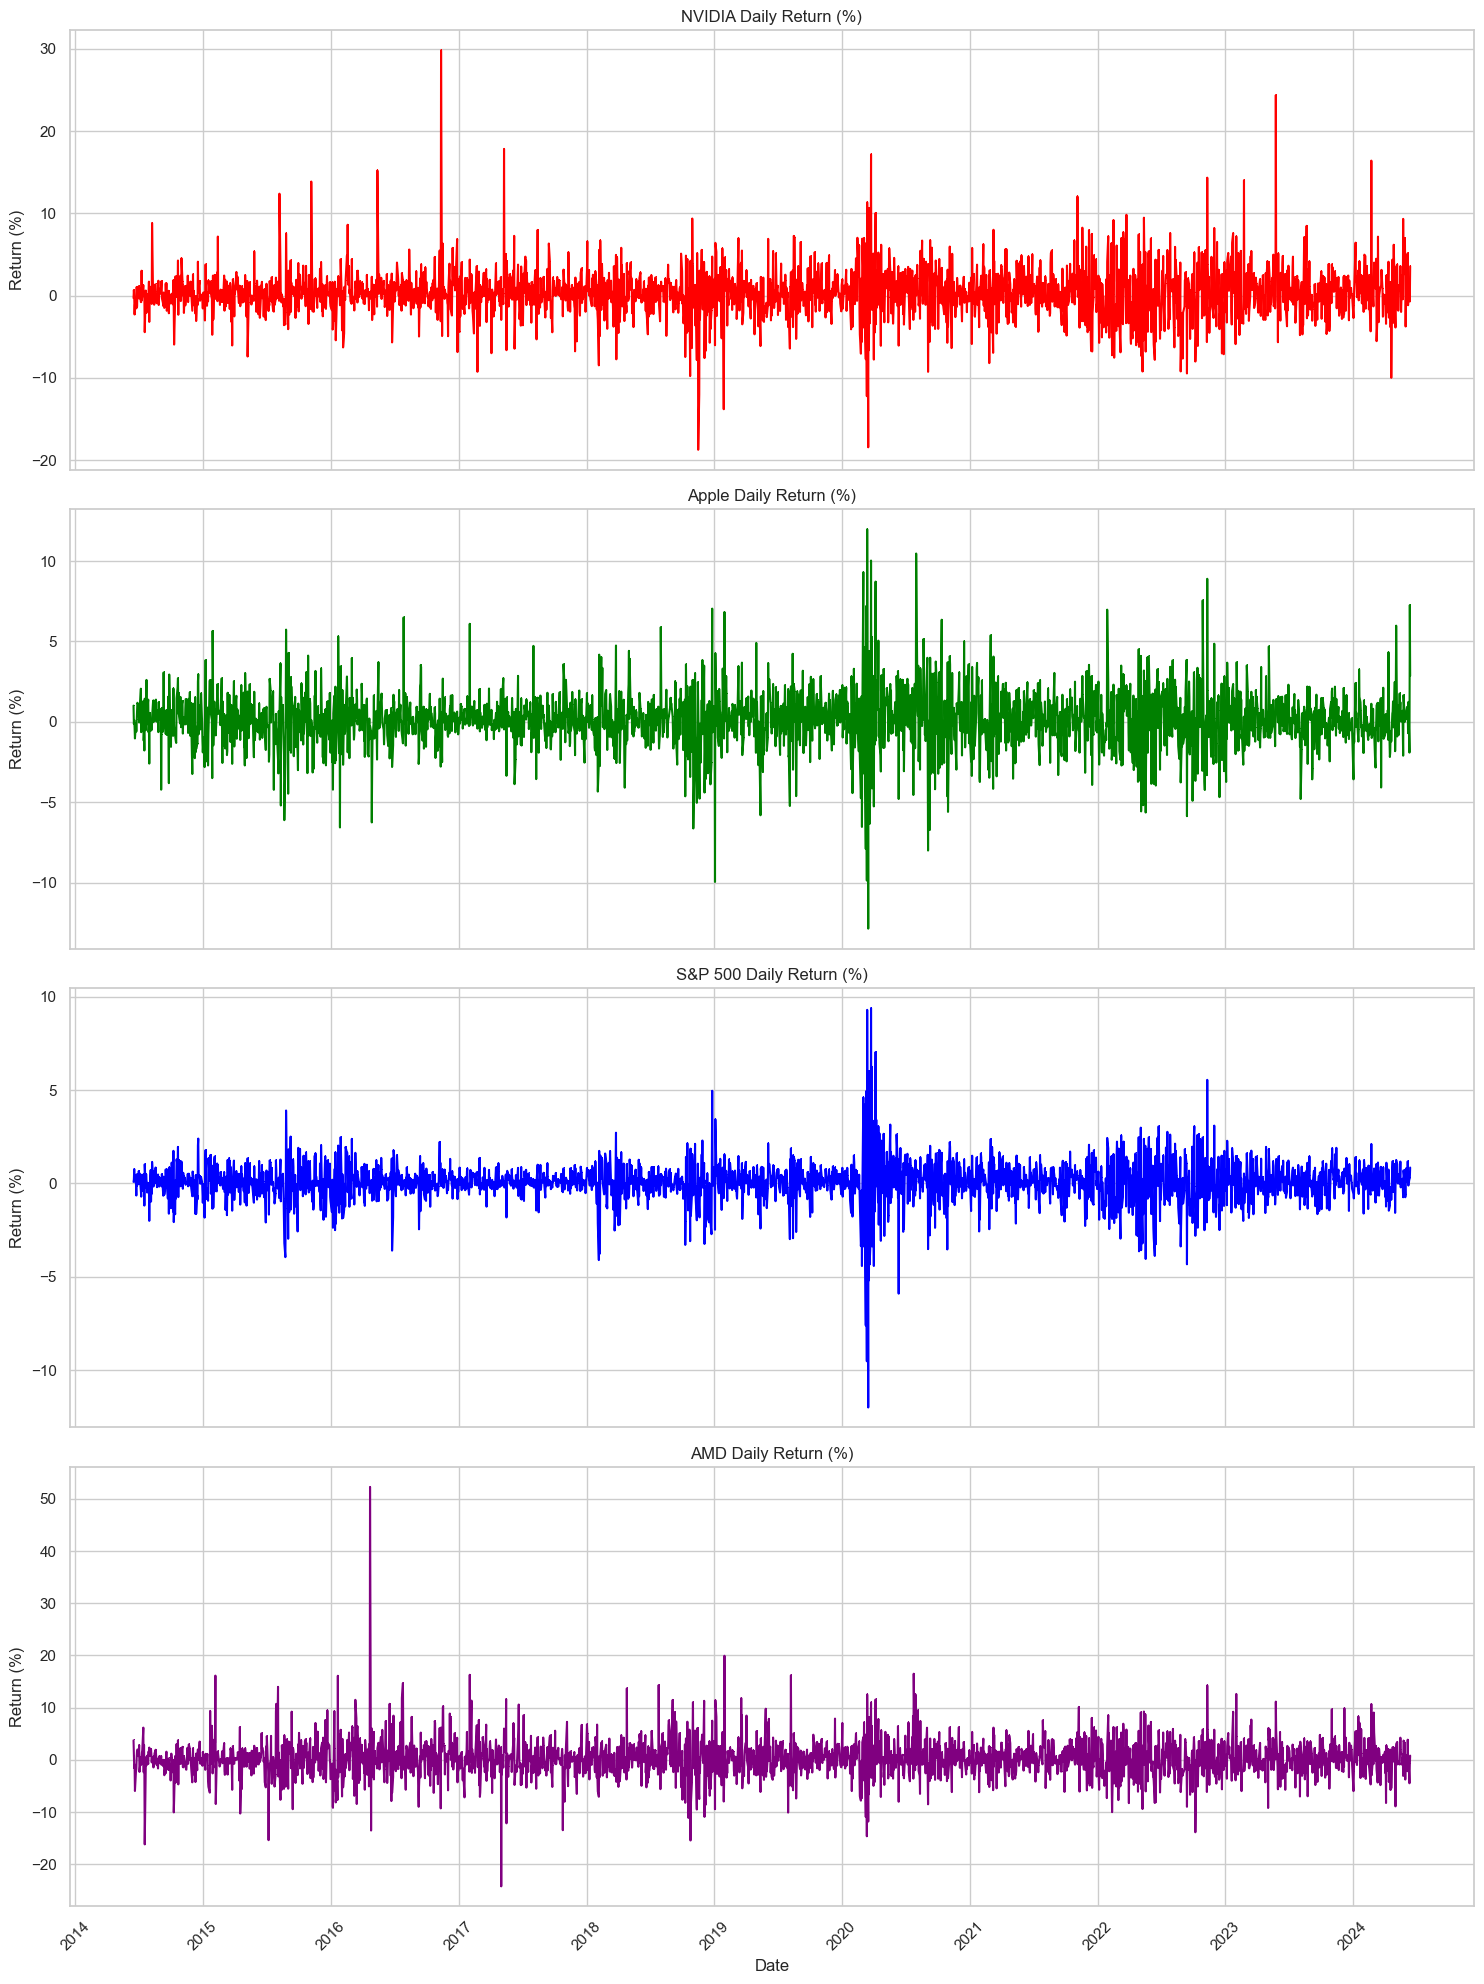

In [19]:
# Calculate the daily returns
cleaned_df['daily_return_nvidia'] = cleaned_df['close_last_nvidia'].pct_change() * 100
cleaned_df['daily_return_apple'] = cleaned_df['close_last_apple'].pct_change() * 100
cleaned_df['daily_return_sp500'] = cleaned_df['close_last_sp500'].pct_change() * 100
cleaned_df['daily_return_amd'] = cleaned_df['close_last_amd'].pct_change() * 100

# Create a figure and a set of subplots
fig, axs = plt.subplots(4, 1, figsize=(15, 20), sharex=True)

# Plot NVIDIA
axs[0].plot(cleaned_df.index, cleaned_df['daily_return_nvidia'], marker=',', linestyle='-', color='red')
axs[0].set_title('NVIDIA Daily Return (%)')
axs[0].set_ylabel('Return (%)')
axs[0].grid(True)

# Plot Apple
axs[1].plot(cleaned_df.index, cleaned_df['daily_return_apple'], marker=',', linestyle='-', color='green')
axs[1].set_title('Apple Daily Return (%)')
axs[1].set_ylabel('Return (%)')
axs[1].grid(True)

# Plot S&P 500
axs[2].plot(cleaned_df.index, cleaned_df['daily_return_sp500'], marker=',', linestyle='-', color='blue')
axs[2].set_title('S&P 500 Daily Return (%)')
axs[2].set_ylabel('Return (%)')
axs[2].grid(True)

# Plot AMD
axs[3].plot(cleaned_df.index, cleaned_df['daily_return_amd'], marker=',', linestyle='-', color='purple')
axs[3].set_title('AMD Daily Return (%)')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('Return (%)')
axs[3].grid(True)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

### Stock Analysis

#### Correlation

                   close_last_nvidia  close_last_apple  close_last_sp500  \
close_last_nvidia           1.000000          0.787965          0.818051   
close_last_apple            0.787965          1.000000          0.968505   
close_last_sp500            0.818051          0.968505          1.000000   
close_last_amd              0.860790          0.953838          0.966322   

                   close_last_amd  
close_last_nvidia        0.860790  
close_last_apple         0.953838  
close_last_sp500         0.966322  
close_last_amd           1.000000  
                     daily_return_nvidia  daily_return_apple  \
daily_return_nvidia             1.000000            0.541763   
daily_return_apple              0.541763            1.000000   
daily_return_sp500              0.634108            0.747149   
daily_return_amd                0.579411            0.413231   

                     daily_return_sp500  daily_return_amd  
daily_return_nvidia            0.634108          0.579411 

Text(0.5, 1.0, 'Correlation Matrix of Daily Returns')

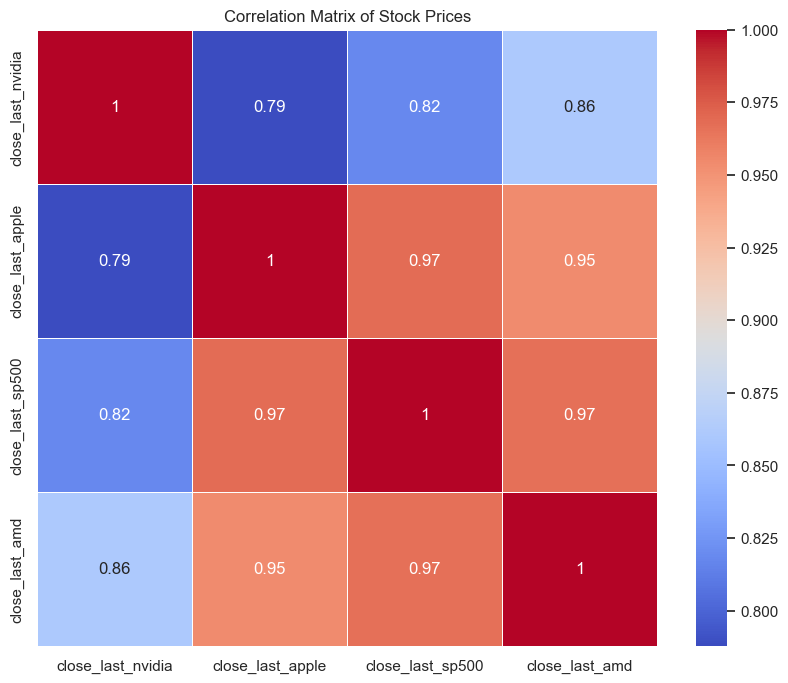

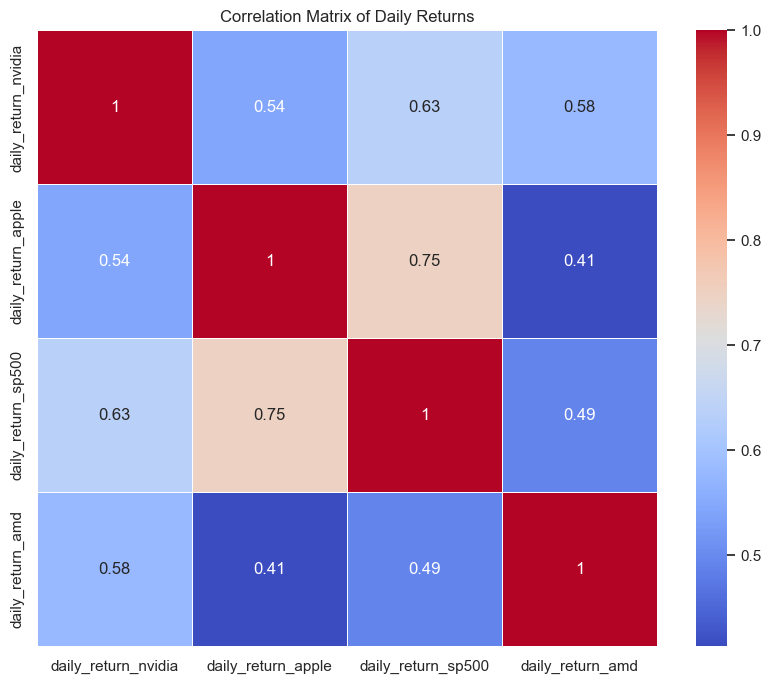

In [20]:
"Correlation for stock closing price each day"

# Create a DataFrame with the closing prices
closing_prices_df = cleaned_df[['close_last_nvidia', 'close_last_apple', 'close_last_sp500', 'close_last_amd']]

# Calculate the correlation matrix
correlation_matrix = closing_prices_df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Stock Prices')

"Correlation for stock return each day"

# Create a DataFrame with the daily returns
daily_return_df = cleaned_df[['daily_return_nvidia', 'daily_return_apple', 'daily_return_sp500', 'daily_return_amd']]

# Drop the NaN values resulting from the diff calculation
daily_return_df = daily_return_df.dropna()

# Calculate the correlation matrix
correlation_matrix = daily_return_df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Daily Returns')

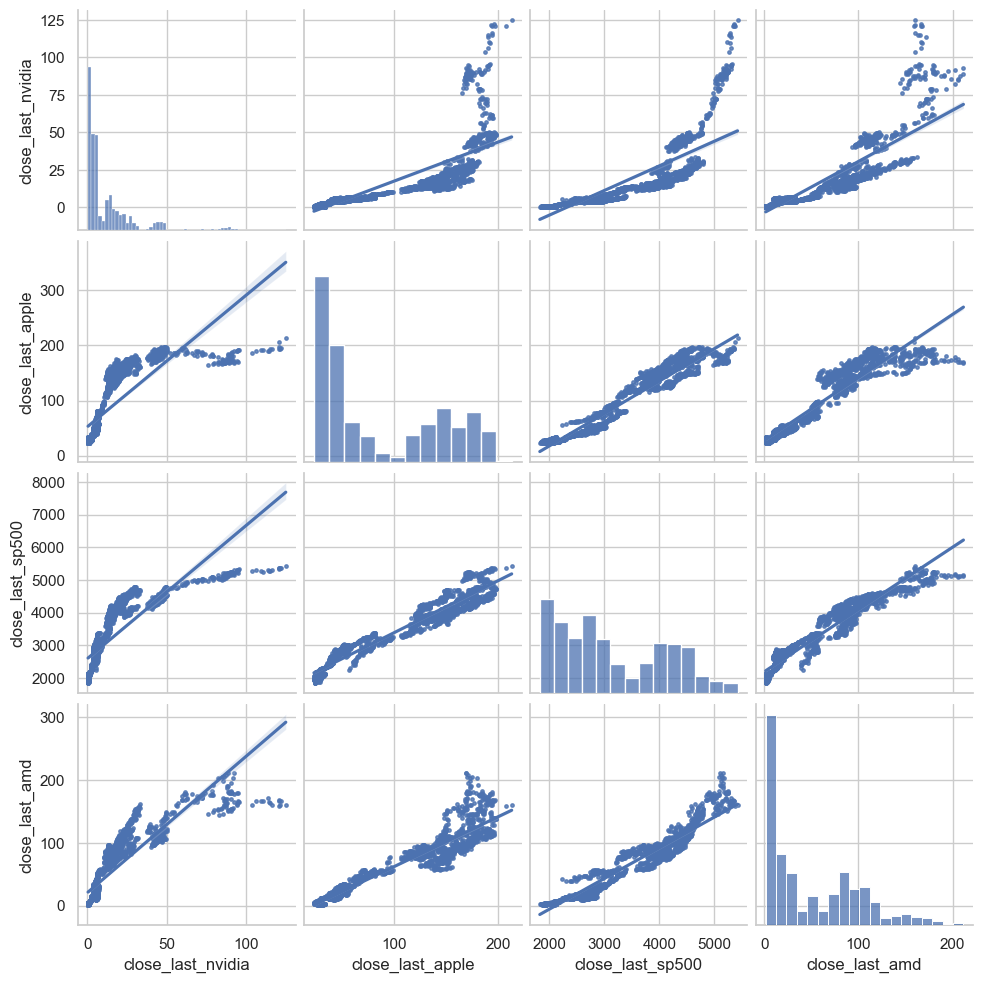

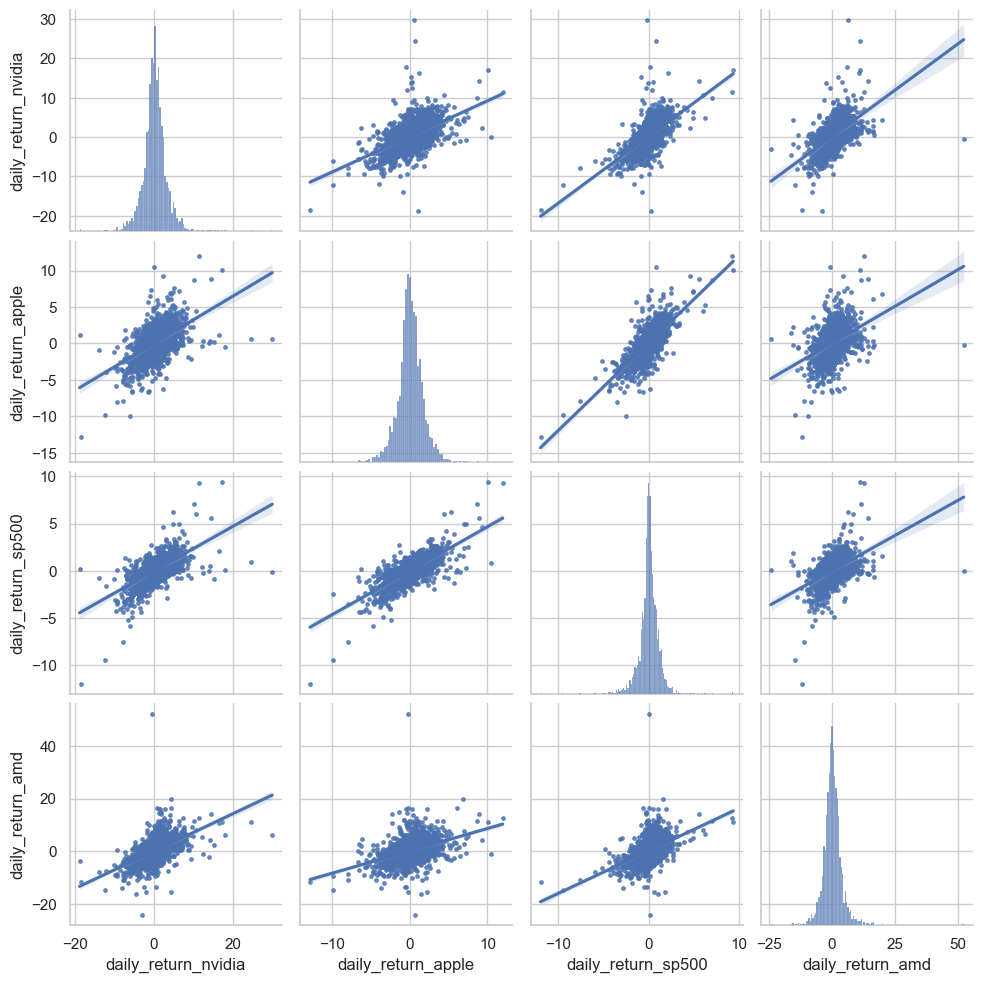

In [21]:
# Linear Relationship of Closing Prices
sns.pairplot(closing_prices_df, kind="reg", plot_kws=dict(scatter_kws=dict(s=6)))

#Linear Relationship of Daily Returns
sns.pairplot(daily_return_df, kind="reg", plot_kws=dict(scatter_kws=dict(s=6)))

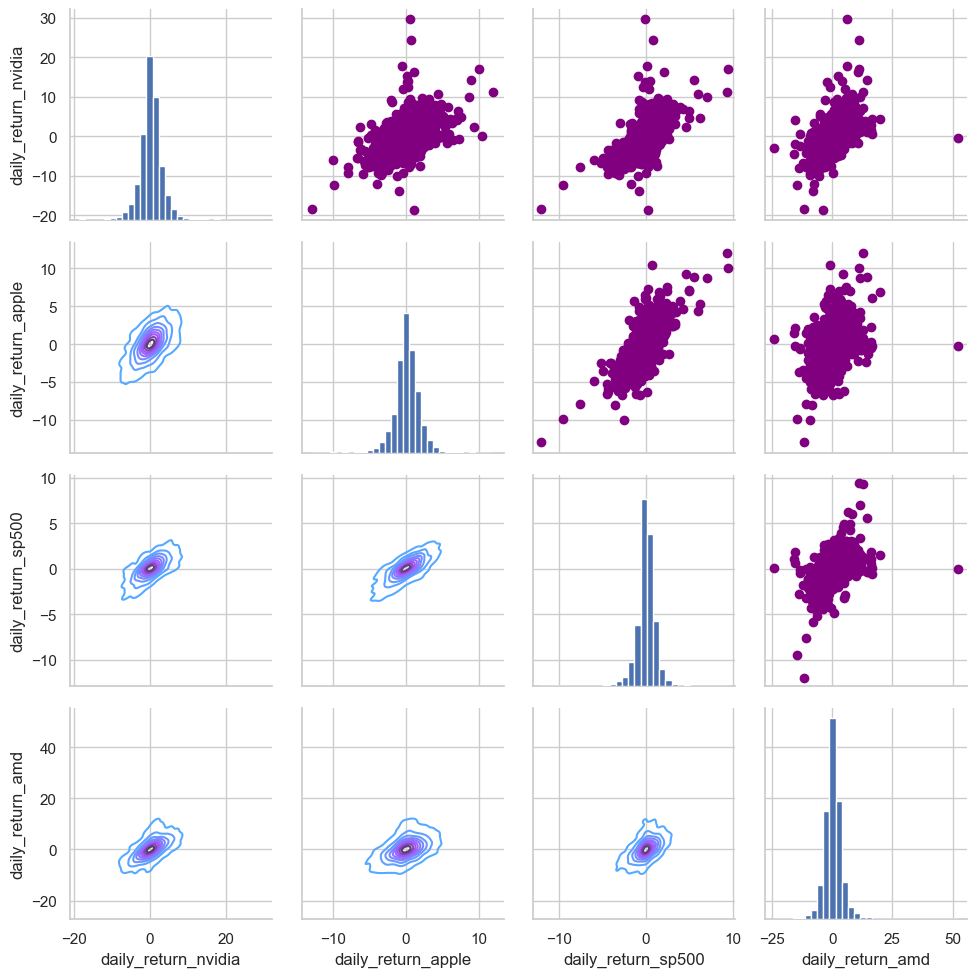

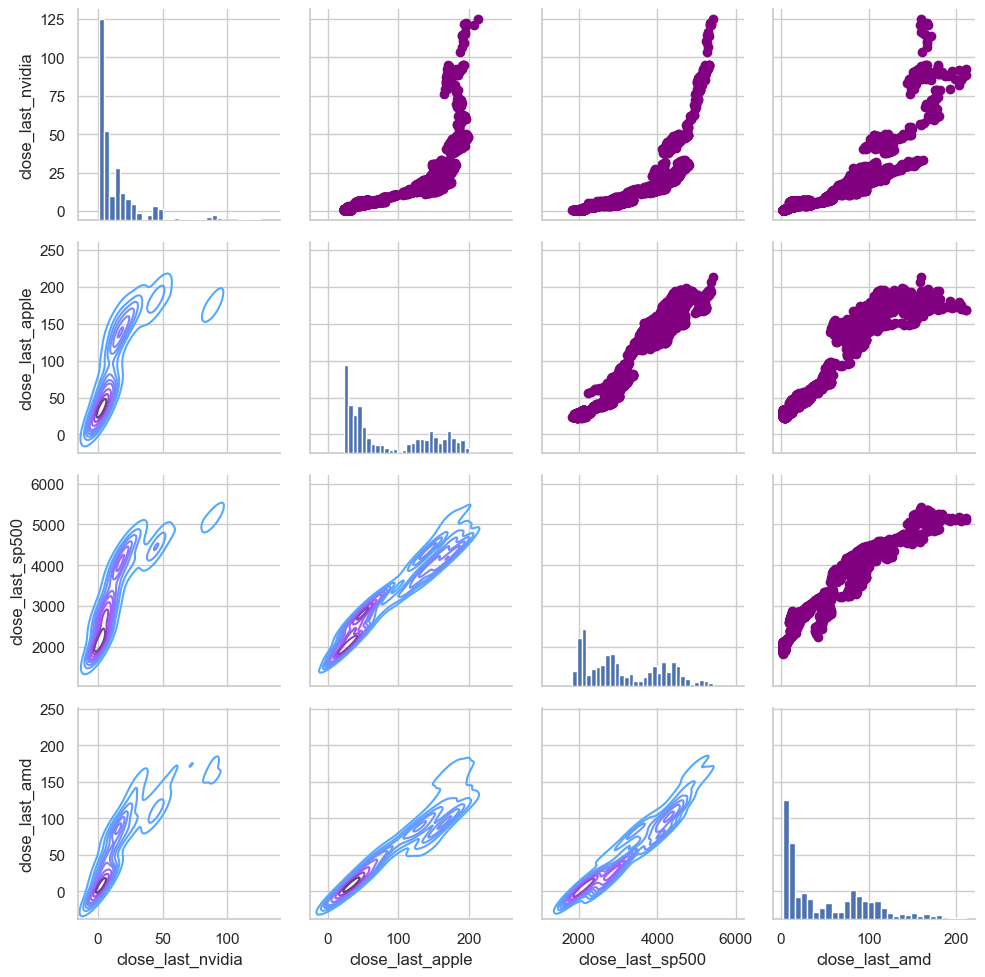

In [22]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(daily_return_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)


return_fig = sns.PairGrid(closing_prices_df.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

#### Risk

##### There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

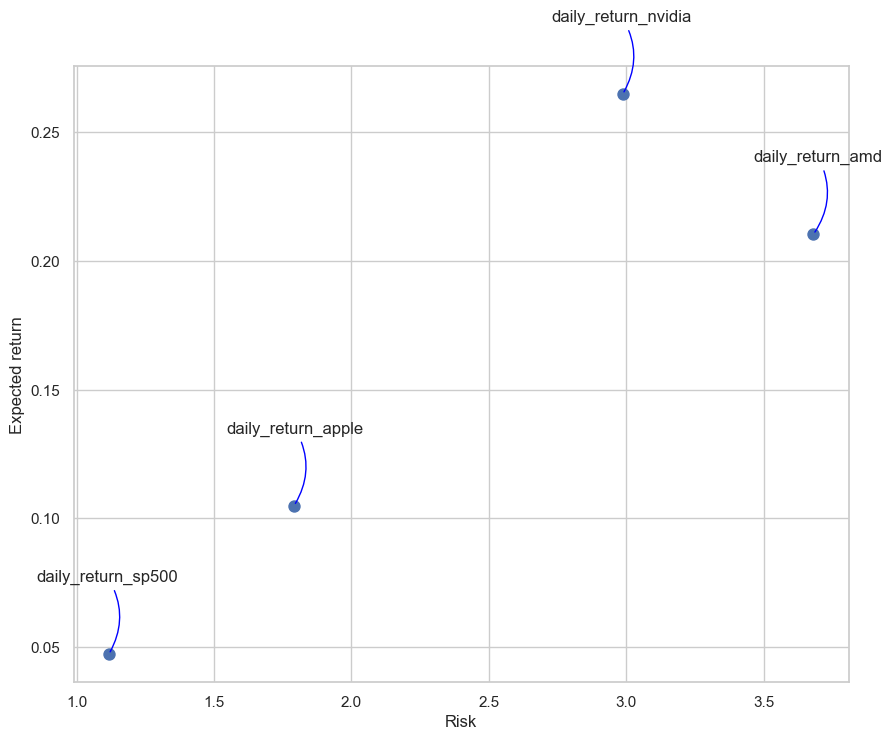

In [23]:
rets = daily_return_df.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.std(), rets.mean(), s=area)
plt.xlabel('Risk')
plt.ylabel('Expected return')

for label, x, y in zip(rets.columns, rets.std(), rets.mean()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


### Predicting the closing price stock price of APPLE

In [24]:
# Create a new dataframe with only the 'Close column 
data = cleaned_df.filter(['close_last_nvidia'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2392

In [25]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[5.52170052e-04],
       [5.40148934e-04],
       [5.66595395e-04],
       ...,
       [9.72671990e-01],
       [9.65619601e-01],
       [1.00000000e+00]])

In [26]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00055217, 0.00054015, 0.0005666 , 0.00056259, 0.00047203,
       0.00043036, 0.00038628, 0.00032778, 0.00036624, 0.00031575,
       0.00031976, 0.00035182, 0.00039429, 0.00038067, 0.00041433,
       0.00038387, 0.00035422, 0.00046642, 0.00044478, 0.0004544 ,
       0.00050248, 0.00051851, 0.0005145 , 0.00050409, 0.00033178,
       0.00035422, 0.00033739, 0.00025966, 0.00026527, 0.00020115,
       0.00018753, 0.00019955, 0.00025966, 0.00014345, 0.00018192,
       0.0001731 , 0.00017551, 0.0001715 , 0.00013544, 0.00044398,
       0.00042394, 0.00042394, 0.00044638, 0.00040391, 0.00045199,
       0.00050409, 0.00051851, 0.00049447, 0.00045841, 0.00046001,
       0.00046642, 0.00053534, 0.00049046, 0.00052252, 0.00053454,
       0.00054335, 0.00058102, 0.00065074, 0.00063792, 0.00060266])]
[0.0005521700523479652]

[array([0.00055217, 0.00054015, 0.0005666 , 0.00056259, 0.00047203,
       0.00043036, 0.00038628, 0.00032778, 0.00036624, 0.00031575,
       0.00031976, 0.00035182, 0.

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2332/2332 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - loss: 5.9383e-04


In [28]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


18.987147807701657

/var/folders/7p/nnq37v5n39s2jtsql5bdy6br0000gn/T/ipykernel_85226/1500446289.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


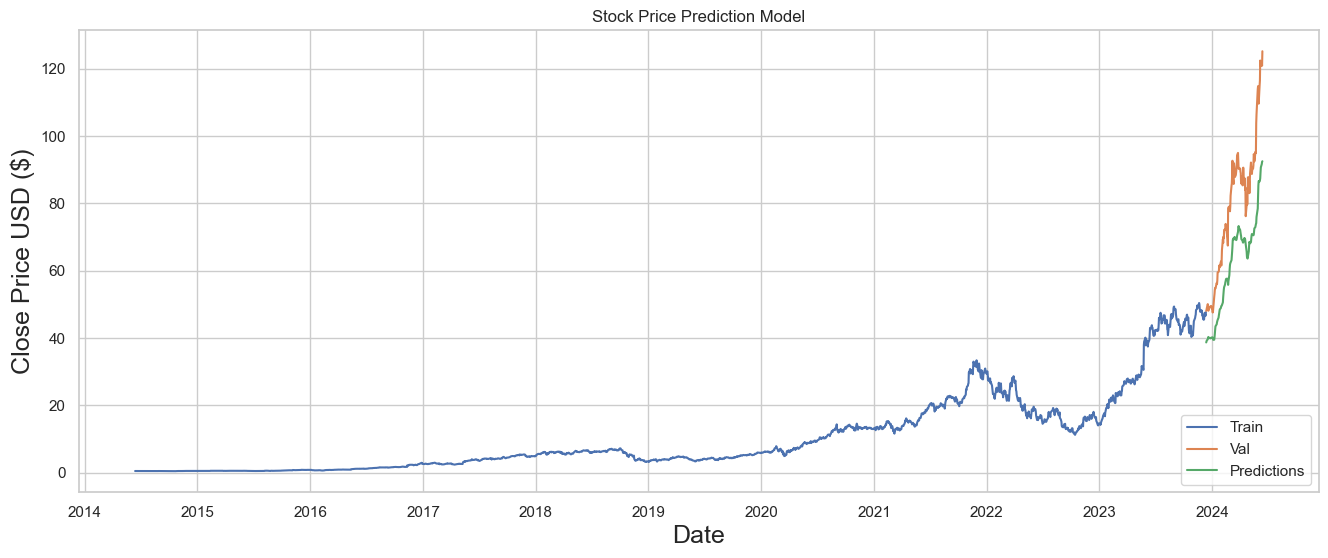

In [29]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Stock Price Prediction Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close_last_nvidia'])
plt.plot(valid[['close_last_nvidia', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()